# Factors that affect Borrower APR and Loan outcome
## by Ediong Alexander


## Investigation Overview
In this investigation, I was interested in finding out the factors that affect the borrowers APR and loan outcome. The dataset contained of 80 variables(columns) but I focused on 17 variables including employment status, income range, and loan categories.
Below are the main insights drawn from the analysis
1. Most of the Prosper loan listings from 9th November, 2005 to 10th March, 2014 was for debt consolidation.
2. Defaulted loans are associated with high APR. This was further investigated to find that the higher the Estimated Avg. Annual Loss Rate which is represented by Prosper ratings, the higher the APR. So loans with high APR are high risk loans.
3. Individuals with higher and stable income received lower APR on their loans.
4. Most employed individuals do not default on their loans.


## Dataset Overview
The dataset contains information on 113937 loans listings from Prosper, a loan company from 2005-11-09 - 2014-03-10. The dataset contains information such as the listing keys, listing date, loan status, etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_clean.csv')
df_corr = pd.read_csv('df_corr.csv')
defaulters = pd.read_csv('defaulters.csv')

## Distribution of loan categories
Contrary to the belief I held that most of the loans would be for business purpose, it turned out there were infact for debt consolidation. The next known categories are Home Improvement and Business

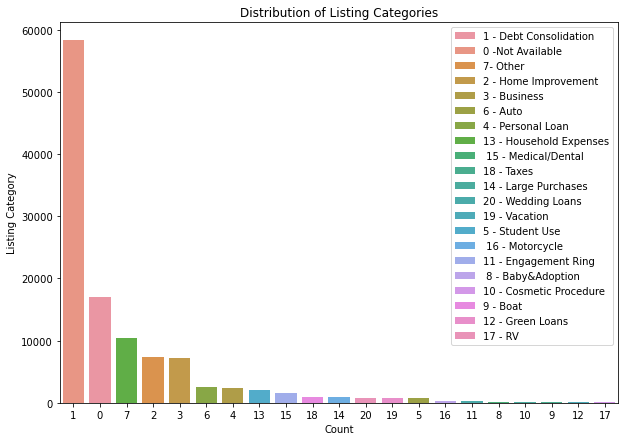

In [3]:
labels = ['1 - Debt Consolidation', '0 -Not Available', '7- Other', '2 - Home Improvement', '3 - Business', '6 - Auto', '4 - Personal Loan', '13 - Household Expenses',' 15 - Medical/Dental', '18 - Taxes', '14 - Large Purchases', '20 - Wedding Loans', '19 - Vacation', '5 - Student Use',' 16 - Motorcycle', '11 - Engagement Ring',' 8 - Baby&Adoption', '10 - Cosmetic Procedure', '9 - Boat' , '12 - Green Loans', '17 - RV']
order=df['ListingCategory (numeric)'].value_counts().index

fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=df, x='ListingCategory (numeric)', order=order, dodge=False, hue='ListingCategory (numeric)')
plt.title('Distribution of Listing Categories')
plt.ylabel('Listing Category')
plt.xlabel('Count')
plt.legend(labels=labels);

## Relationship between APR and loan outcome

Defaulted loans are associated with high APR. This was further investigated to find that the higher the Estimated Avg. Annual Loss Rate which is represented by Prosper ratings, the higher the APR. So loans with high APR are high risk loans and tend to default.

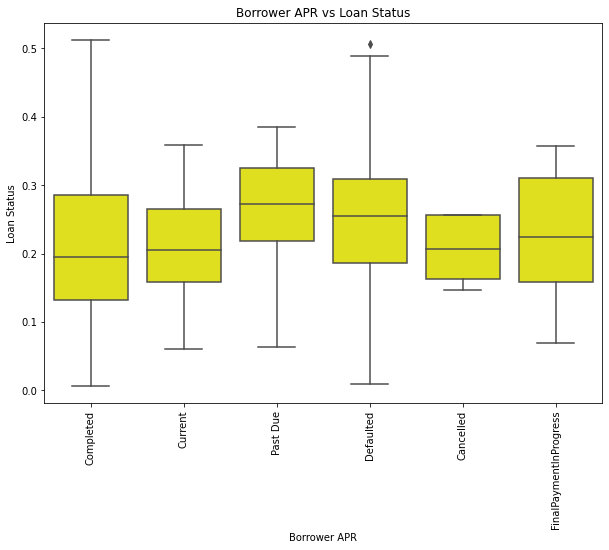

In [4]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(data=df, x='LoanStatus_m', y='BorrowerAPR', color='yellow')
plt.xticks(rotation=90)
plt.title('Borrower APR vs Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Borrower APR');

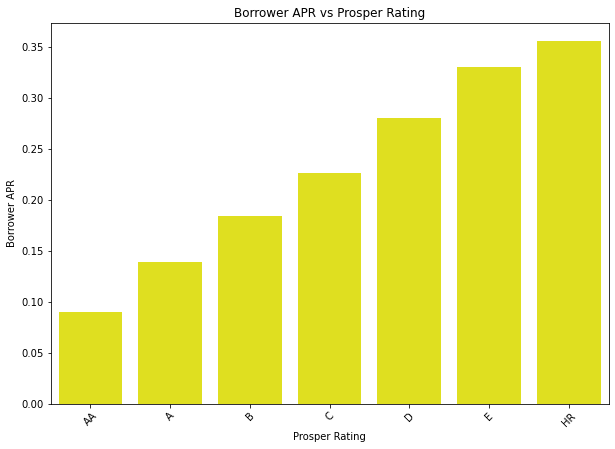

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=df['ProsperRating (Alpha)'], y=df['BorrowerAPR'], order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ci=None, color='yellow')
plt.xticks(rotation=90)
plt.title('Borrower APR vs Prosper Rating')
plt.ylabel('Borrower APR')
plt.xlabel('Prosper Rating')
plt.xticks(rotation=45);

## Relationship between employment status, income and APR

Individuals with higher and stable income received lower APR on their loans.

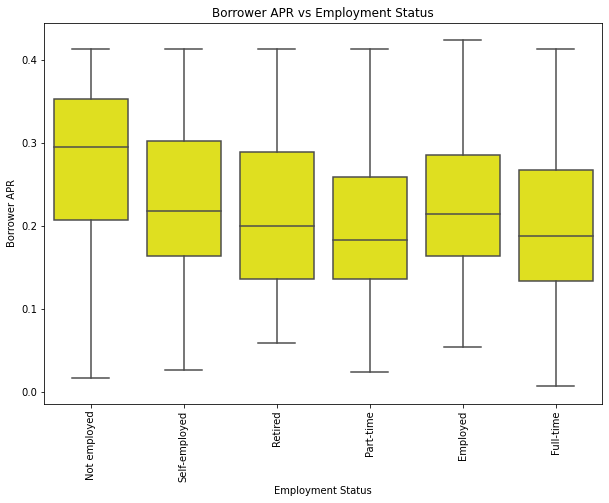

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
order = ['Not employed','Self-employed', 'Retired', 'Part-time', 'Employed', 'Full-time']
sns.boxplot(data=df, x='EmploymentStatus', y='BorrowerAPR', order=order, color='yellow')
plt.xticks(rotation=90)
plt.ylabel('Borrower APR')
plt.xlabel('Employment Status')
plt.title('Borrower APR vs Employment Status');

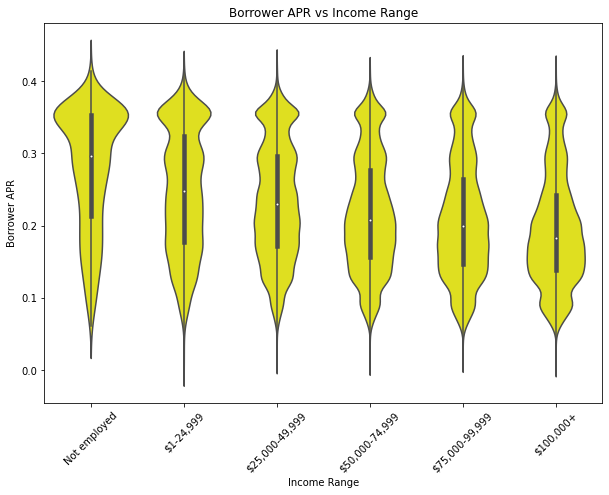

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
order=['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sns.violinplot(data=df, x='IncomeRange', y='BorrowerAPR', order=order, color='yellow')
plt.xticks(rotation=45)
plt.ylabel('Borrower APR')
plt.xlabel('Income Range')
plt.title('Borrower APR vs Income Range');

## Relationship between employment status and loan outcome
Most employed individuals do not default on their loans, while listings where employment status was unavailable followed by retired and unemployed individuals topped the chart.

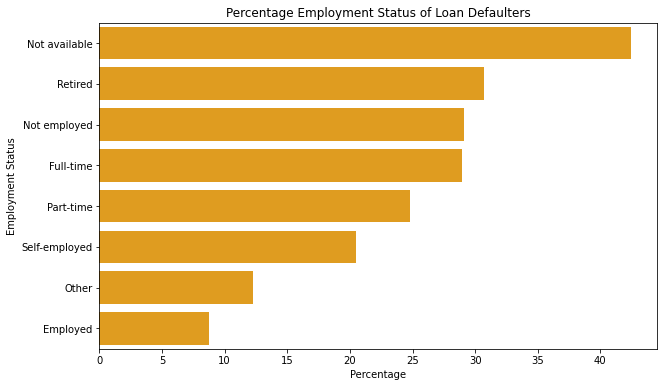

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=defaulters, y='EmploymentStatus', x='PercentOfTotal', color='orange')
plt.title('Percentage Employment Status of Loan Defaulters')
plt.ylabel('Employment Status')
plt.xlabel('Percentage');